In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px


In [2]:

# Load the data from the Excel file
df = pd.read_excel('Telco_customer_churn.xlsx')

In [2]:
df.head()

NameError: name 'df' is not defined

In [4]:
df_test = df.copy()

In [5]:
df_test.head()

CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges Total Charges  \
0               Yes               Mailed check            53.85        108.15   
1               Yes           Electronic check            70.70        151.65   
2               Yes           Electronic check            99.65         820.5   
3               Yes           Electronic check           104.80       3046.05   
4               Yes  Bank transfer (automatic)           103.70        5036.3   

  Churn Label Churn Value Churn Score  CLTV                   Churn Reason  
0         Yes           1          86  3239   Competitor made better offer  
1         Yes           1          67  2701                          Moved  
2         Yes           1          86  5372                          Moved  
3         Yes           1          84  5003                          Moved  
4         Yes           1          89  5340  Competitor had better devices  

[5 rows x 33 columns]

In [6]:
def summary(df):
    table = pd.DataFrame()
    table['Column'] = [col for col in df.columns]
    table['Dtype'] = [df[col].dtypes for col in df.columns]
    table['n_unique'] = [df[col].nunique() for col in df.columns]
    table['missing values'] = [df[col].isnull().sum() for col in df.columns]
    table['unique values'] = [df[col].unique() for col in df.columns]
    pd.set_option('max_colwidth', None)
    print('The dataset has {} customers and {} variables.\n'.format(df.shape[0], df.shape[1]))
    print('Duplicated rows: {}\n'.format(df.duplicated().sum()))
    return table.style.set_properties(**{'text-align': 'left'})

summary(df)

The dataset has 7043 customers and 33 variables.

Duplicated rows: 0



In [7]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')


In [8]:
df.isna().sum()


CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [9]:
df[(df['Total Charges'].isnull()) | (df['Tenure Months']==0)]


CustomerID  Count        Country       State            City  Zip Code  \
2234  4472-LVYGI      1  United States  California  San Bernardino     92408   
2438  3115-CZMZD      1  United States  California    Independence     93526   
2568  5709-LVOEQ      1  United States  California       San Mateo     94401   
2667  4367-NUYAO      1  United States  California       Cupertino     95014   
2856  1371-DWPAZ      1  United States  California        Redcrest     95569   
4331  7644-OMVMY      1  United States  California     Los Angeles     90029   
4687  3213-VVOLG      1  United States  California        Sun City     92585   
5104  2520-SGTTA      1  United States  California      Ben Lomond     95005   
5719  2923-ARZLG      1  United States  California        La Verne     91750   
6772  4075-WKNIU      1  United States  California            Bell     90201   
6840  2775-SEFEE      1  United States  California      Wilmington     90744   

                    Lat Long   Latitude   Longitude  Gender  ...  Contract  \
2234  34.084909, -117.258107  34.084909 -117.258107  Female  ...  Two year   
2438  36.869584, -118.189241  36.869584 -118.189241    Male  ...  Two year   
2568  37.590421, -122.306467  37.590421 -122.306467  Female  ...  Two year   
2667  37.306612, -122.080621  37.306612 -122.080621    Male  ...  Two year   
2856  40.363446, -123.835041  40.363446 -123.835041  Female  ...  Two year   
4331  34.089953, -118.294824  34.089953 -118.294824    Male  ...  Two year   
4687  33.739412, -117.173334  33.739412 -117.173334    Male  ...  Two year   
5104  37.078873, -122.090386  37.078873 -122.090386  Female  ...  Two year   
5719  34.144703, -117.770299  34.144703 -117.770299    Male  ...  One year   
6772  33.970343, -118.171368  33.970343 -118.171368  Female  ...  Two year   
6840  33.782068, -118.262263  33.782068 -118.262263    Male  ...  Two year   

     Paperless Billing             Payment Method  Monthly Charges  \
2234               Yes  Bank transfer (automatic)            52.55   
2438                No               Mailed check            20.25   
2568                No               Mailed check            80.85   
2667                No               Mailed check            25.75   
2856                No    Credit card (automatic)            56.05   
4331                No               Mailed check            19.85   
4687                No               Mailed check            25.35   
5104                No               Mailed check            20.00   
5719               Yes               Mailed check            19.70   
6772                No               Mailed check            73.35   
6840               Yes  Bank transfer (automatic)            61.90   

     Total Charges Churn Label Churn Value Churn Score  CLTV Churn Reason  
2234           NaN          No           0          36  2578          NaN  
2438           NaN          No           0          68  5504          NaN  
2568           NaN          No           0          45  2048          NaN  
2667           NaN          No           0          48  4950          NaN  
2856           NaN          No           0          30  4740          NaN  
4331           NaN          No           0          53  2019          NaN  
4687           NaN          No           0          49  2299          NaN  
5104           NaN          No           0          27  3763          NaN  
5719           NaN          No           0          69  4890          NaN  
6772           NaN          No           0          44  2342          NaN  
6840           NaN          No           0          65  5188          NaN  

[11 rows x 33 columns]

In [10]:
df['Total Charges'].fillna(0, inplace=True)


In [11]:
df.head(3)


CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   

  Paperless Billing    Payment Method  Monthly Charges Total Charges  \
0               Yes      Mailed check            53.85        108.15   
1               Yes  Electronic check            70.70        151.65   
2               Yes  Electronic check            99.65        820.50   

  Churn Label Churn Value Churn Score  CLTV                  Churn Reason  
0         Yes           1          86  3239  Competitor made better offer  
1         Yes           1          67  2701                         Moved  
2         Yes           1          86  5372                         Moved  

[3 rows x 33 columns]

## EDA

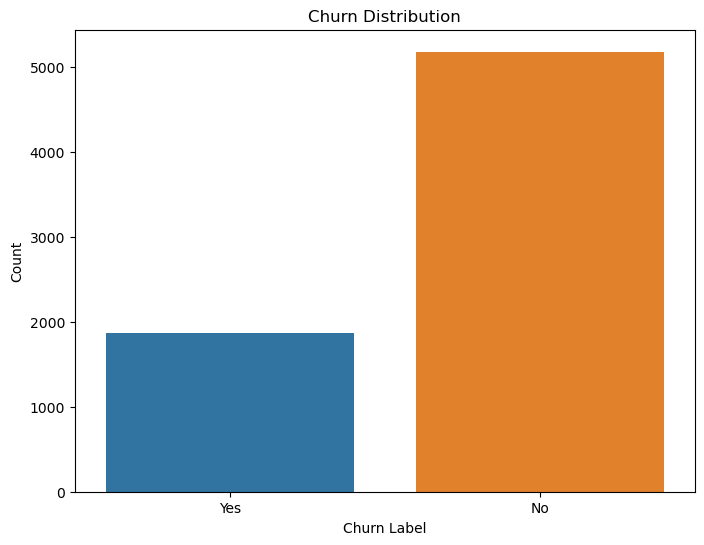

Churn Distribution:
Churn Label
No     5174
Yes    1869
Name: count, dtype: int64


'\n# Gender distribution\ngender_counts = df[\'Gender\'].value_counts()\nplt.figure(figsize=(8, 6))\nsns.countplot(x=\'Gender\', data=df)\nplt.title("Gender Distribution")\nplt.xlabel("Gender")\nplt.ylabel("Count")\nplt.show()\nprint("Gender Distribution:")\nprint(gender_counts)\n\n# Tenure distribution\nplt.figure(figsize=(8, 6))\nsns.histplot(data=df, x=\'Tenure Months\', bins=30, kde=True)\nplt.title("Tenure Months Distribution")\nplt.xlabel("Tenure Months")\nplt.ylabel("Count")\nplt.show()\n\n# Monthly charges distribution\nplt.figure(figsize=(8, 6))\nsns.histplot(data=df, x=\'Monthly Charges\', bins=30, kde=True)\nplt.title("Monthly Charges Distribution")\nplt.xlabel("Monthly Charges")\nplt.ylabel("Count")\nplt.show()\n\n# Contract type distribution\ncontract_counts = df[\'Contract\'].value_counts()\nplt.figure(figsize=(8, 6))\nsns.countplot(x=\'Contract\', data=df)\nplt.title("Contract Type Distribution")\nplt.xlabel("Contract Type")\nplt.ylabel("Count")\nplt.show()\nprint("Contr

In [12]:
# Churn distribution
churn_counts = df['Churn Label'].value_counts()
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn Label', data=df)
plt.title("Churn Distribution")
plt.xlabel("Churn Label")
plt.ylabel("Count")
plt.show()
print("Churn Distribution:")
print(churn_counts)

'''
# Gender distribution
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()
print("Gender Distribution:")
print(gender_counts)

# Tenure distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Tenure Months', bins=30, kde=True)
plt.title("Tenure Months Distribution")
plt.xlabel("Tenure Months")
plt.ylabel("Count")
plt.show()

# Monthly charges distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Monthly Charges', bins=30, kde=True)
plt.title("Monthly Charges Distribution")
plt.xlabel("Monthly Charges")
plt.ylabel("Count")
plt.show()

# Contract type distribution
contract_counts = df['Contract'].value_counts()
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', data=df)
plt.title("Contract Type Distribution")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.show()
print("Contract Type Distribution:")
print(contract_counts)
'''

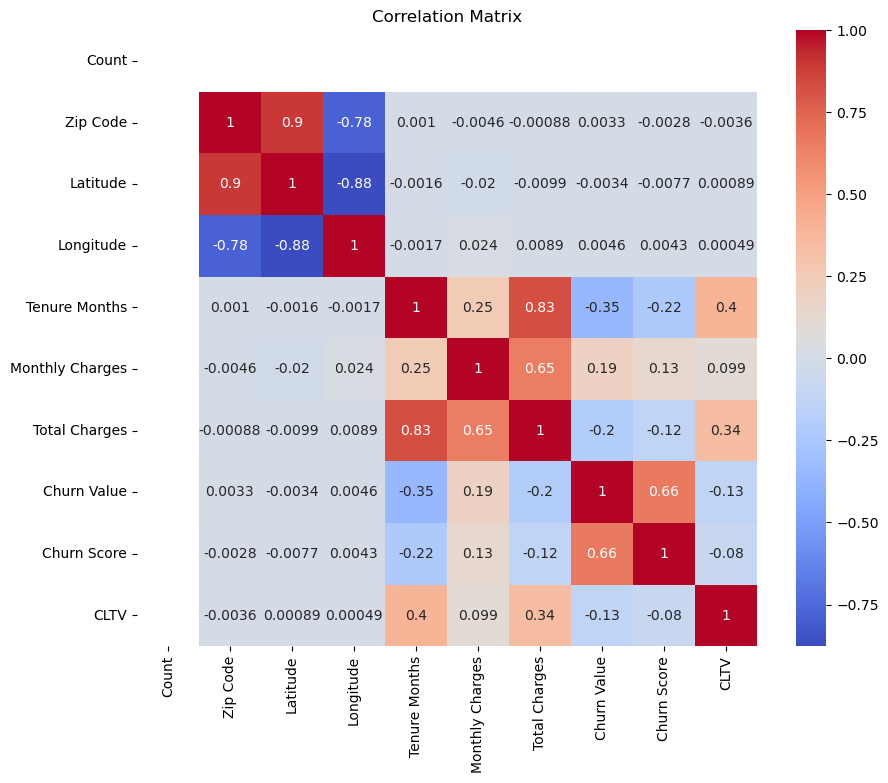

In [13]:
# Select numeric columns for correlation matrix
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

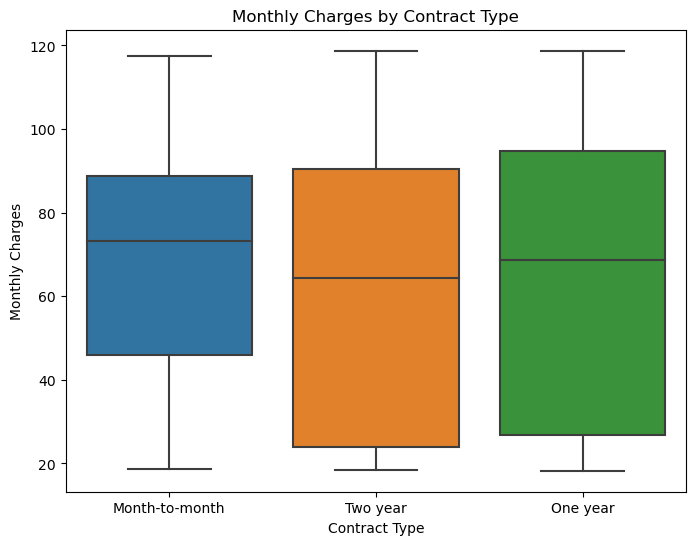

In [14]:
# Monthly Charges by Contract Type
plt.figure(figsize=(8, 6))
sns.boxplot(x='Contract', y='Monthly Charges', data=df)
plt.title("Monthly Charges by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Monthly Charges")
plt.show()

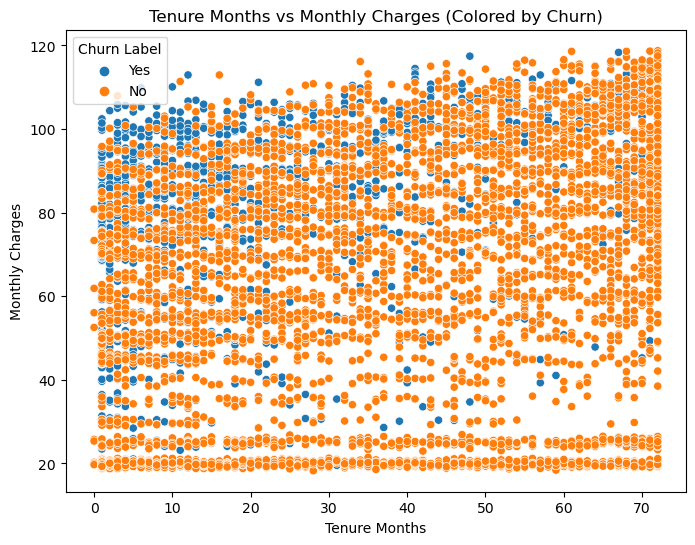

In [15]:
#Tenure Months vs Monthly Charges (Colored by Churn)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Tenure Months', y='Monthly Charges', hue='Churn Label', data=df)
plt.title("Tenure Months vs Monthly Charges (Colored by Churn)")
plt.xlabel("Tenure Months")
plt.ylabel("Monthly Charges")
plt.show()

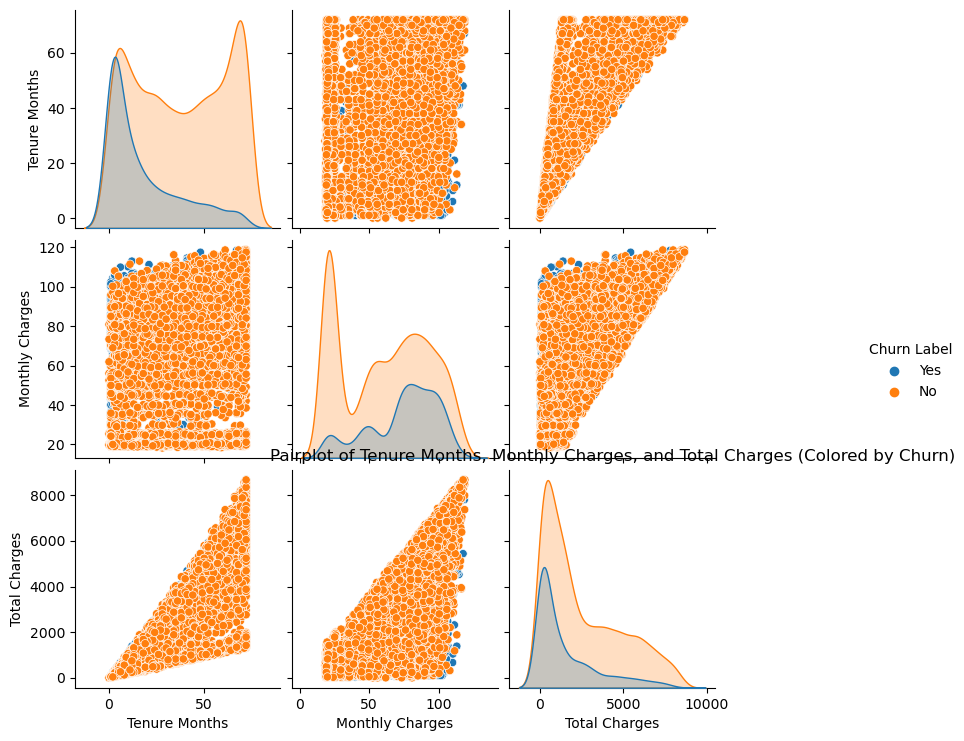

In [16]:
# Pairplot of Tenure Months, Monthly Charges, and Total Charges (Colored by Churn)
sns.pairplot(df, vars=['Tenure Months', 'Monthly Charges', 'Total Charges'], hue='Churn Label')
plt.title("Pairplot of Tenure Months, Monthly Charges, and Total Charges (Colored by Churn)")
plt.show()

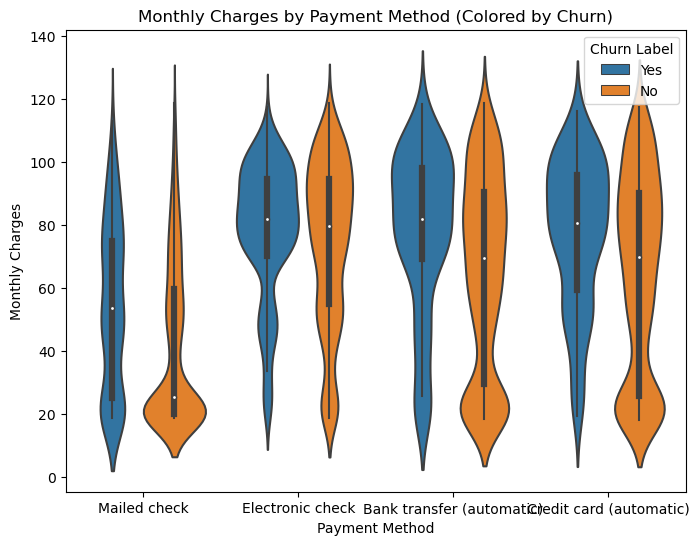

In [17]:
# Monthly Charges by Payment Method (Colored by Churn)

plt.figure(figsize=(8, 6))
sns.violinplot(x='Payment Method', y='Monthly Charges', hue='Churn Label', data=df)
plt.title("Monthly Charges by Payment Method (Colored by Churn)")
plt.xlabel("Payment Method")
plt.ylabel("Monthly Charges")
plt.show()

## Reason for churn mentioned by the customer

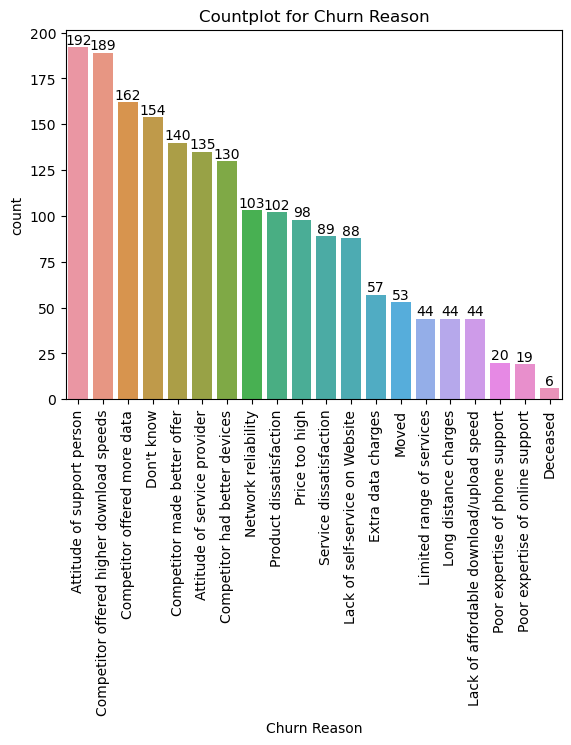

In [18]:
#p = 'crest'
ax = sns.countplot(data=df, x='Churn Reason', order=df['Churn Reason'].value_counts().index)
ax.set_title('Countplot for Churn Reason')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for container in ax.containers:
    ax.bar_label(container)

In [19]:
# Creating new column to narrow down the churn reason 

df['Churn Reason'].fillna('Not Applicable', inplace=True)

def categorize_reason(reason):
    if reason=='Not Applicable':
        return np.nan
    elif reason.split(' ')[0]=='Competitor':
        return 'Competition'
    elif reason.split(' ')[-1]=='dissatisfaction':
        return 'Dissatisfaction'
    elif (reason.split(' ')[0]=='Moved') | (reason.split(' ')[0]=='Deceased'):
        return 'Need'
    elif (reason.split(' ')[0]=='Price') | (reason.split(' ')[-1]=='charges'):
        return 'Price'
    elif (reason.split(' ')[0]=='Poor') | (reason.split(' ')[0]=='Attitude'):
        return 'CS Support' 
    elif reason=="Don't know":
        return 'Others'
    else: 
        return 'Product'

    
    
df['Root Cause'] = df['Churn Reason'].apply(lambda x : categorize_reason(str(x)))

df['Root Cause'].unique()

array(['Competition', 'Need', 'Price', 'Dissatisfaction', 'Product',
       'Others', 'CS Support', nan], dtype=object)

In [20]:
# convert the string categorical variables into the numeric variables.

df['Gender'] = df['Gender'].map({'Female':1, 'Male':0})

df['Contract'] = df['Contract'].map({'Two year':2, 'One year':1, 'Month-to-month':0})

for col in ['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Paperless Billing']:
    df[col] = df[col].map({'Yes':1, 'No':0})

df['Multiple Lines'] = df['Multiple Lines'].map({'Yes':1, 'No':0, 'No phone service':0})

df['Payment Method'] = df['Payment Method'].map({'Credit card (automatic)':3, 'Bank transfer (automatic)':2, 'Mailed check':1, 'Electronic check':0})

df['Internet Service'] = df['Internet Service'].map({'Fiber optic':2, 'DSL':1, 'No':0}) 

for col in ['Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies']:
    df[col] = df[col].map({'Yes':1, 'No':0, 'No internet service':0})



In [21]:
df1 = df[df['Root Cause'].notnull()]['Root Cause'].value_counts().sort_values(ascending=False).reset_index()
df1['cumulative %'] = df1['count'].cumsum() / df1['count'].sum() * 100
df1

Root Cause  count  cumulative %
0      Competition    621     33.226324
1       CS Support    366     52.808989
2          Product    279     67.736758
3            Price    199     78.384163
4  Dissatisfaction    191     88.603531
5           Others    154     96.843232
6             Need     59    100.000000

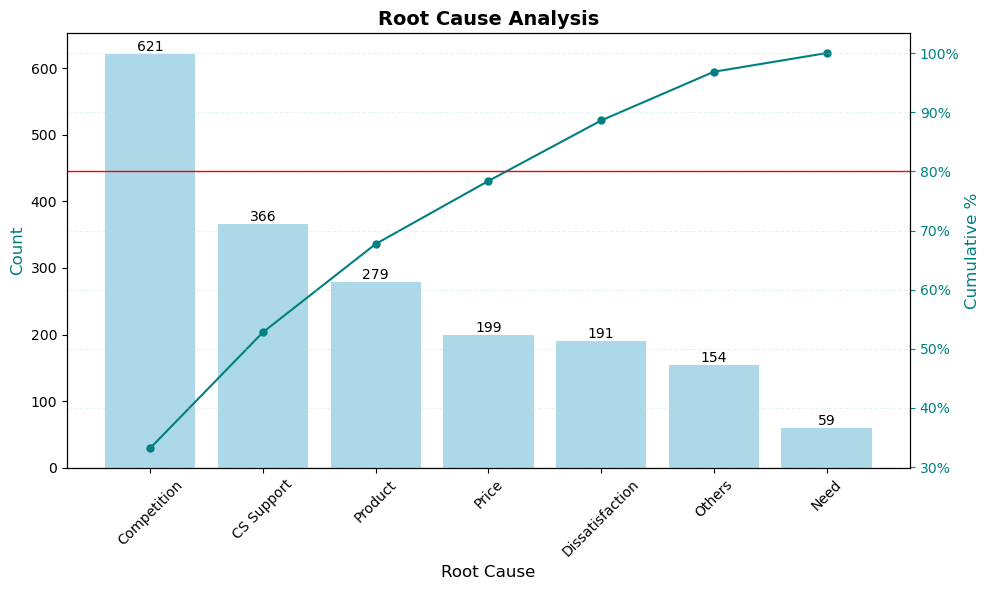

In [22]:
from matplotlib.ticker import PercentFormatter

# Set up figure and axes
fig, ax = plt.subplots(figsize=(10, 6))
ax2 = ax.twinx()

# Plot the bar chart
bar_color = '#ADD8E7'  # Light blue color
ax.bar(df1['Root Cause'], df1['count'], color=bar_color, zorder=2)
for container in ax.containers:
    ax.bar_label(container, color='black', fontsize=10)  # Add labels to the bars

# Plot the line chart
line_color = '#008080'  # Dark teal color
marker_color = 'black'
ax2.plot(df1['Root Cause'], df1['cumulative %'], color=line_color, marker='o', ms=5, zorder=1)
ax2.axhline(y=80, linewidth=1, color='r')

# Adjust y-axis formatting and labels
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.tick_params(axis='y', colors=line_color, labelsize=10)

# Add grid lines
ax2.grid(axis='y', zorder=0, linestyle='--', alpha=0.3, color=bar_color)

# Set x-axis label and tick label rotation
ax.set_xlabel('Root Cause', fontsize=12)
ax.tick_params(axis='x', labelrotation=45)

# Set y-axis labels
ax.set_ylabel('Count', color=line_color, fontsize=12)
ax2.set_ylabel('Cumulative %', color=line_color, fontsize=12)

# Set title
plt.title('Root Cause Analysis', fontsize=14, fontweight='bold')

# Adjust spacing and layout
plt.tight_layout()

# Display the plot
plt.show()

###  The root cause of the Competition should try to be addressed first, followed by the Attitude, Product and Price to minimize the majority of customer churn.

## Customer location

In [23]:
df['Lat Long'].nunique()

1652

### There are 1652 coordinates (Lat Long) in the dataset

In [24]:
# Customer counter per lat-long
coor_count = df.groupby(['Latitude', 'Longitude'])['CustomerID'].count().reset_index(name='count')

In [25]:
coor_count.head()

Latitude   Longitude  count
0  32.555828 -117.040073      5
1  32.578103 -117.012975      5
2  32.579134 -117.119009      5
3  32.587557 -116.636816      5
4  32.605012 -116.975950      5

In [26]:
print('The minimum number of customers: {} \nThe maximum number of customers: {}'.format(coor_count['count'].min(), coor_count['count'].max()))

The minimum number of customers: 4 
The maximum number of customers: 5


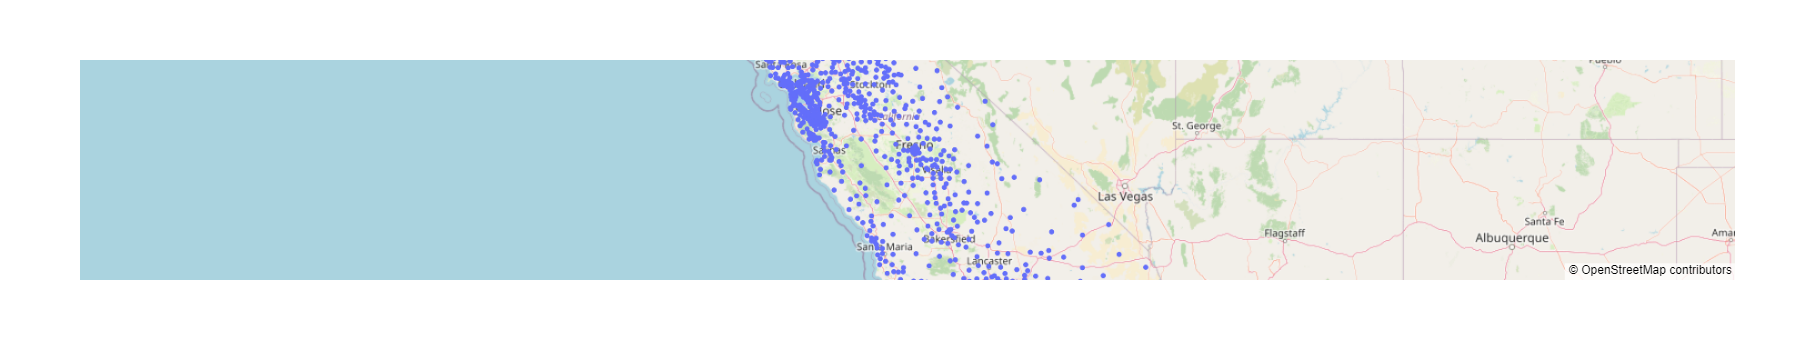

In [27]:
fig = px.scatter_mapbox(coor_count,
                  lat='Latitude',
                  lon='Longitude',
                  hover_data=['count'],
                  zoom=5)

fig.update_layout(mapbox_style='open-street-map')

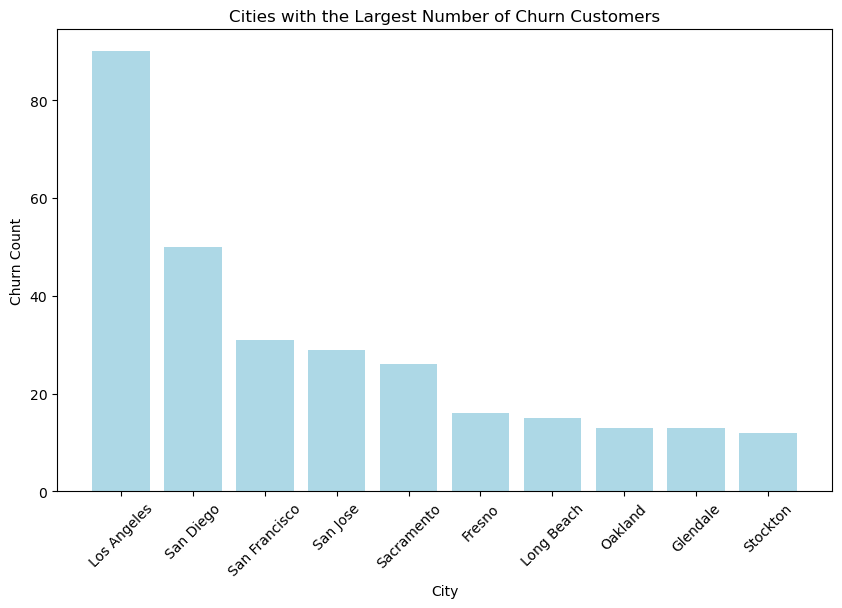

In [28]:
# Top 10 cities with customer churn 

# Calculate the churn count for each city
city_churn_count = df.groupby('City')['Churn Value'].sum().reset_index()

# Sort the cities based on churn count in descending order
sorted_cities = city_churn_count.sort_values('Churn Value', ascending=False)

# Select the top N cities with the largest churn count
top_n = 10  # Specify the number of cities to display

# Extract the top N cities and their churn counts
top_cities = sorted_cities.head(top_n)
city_names = top_cities['City']
churn_counts = top_cities['Churn Value']

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(city_names, churn_counts, color='lightblue')

# Set the chart title and labels
plt.title('Cities with the Largest Number of Churn Customers')
plt.xlabel('City')
plt.ylabel('Churn Count')

# Rotate the x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Display the chart
plt.show()

### Features  associated with customer churn

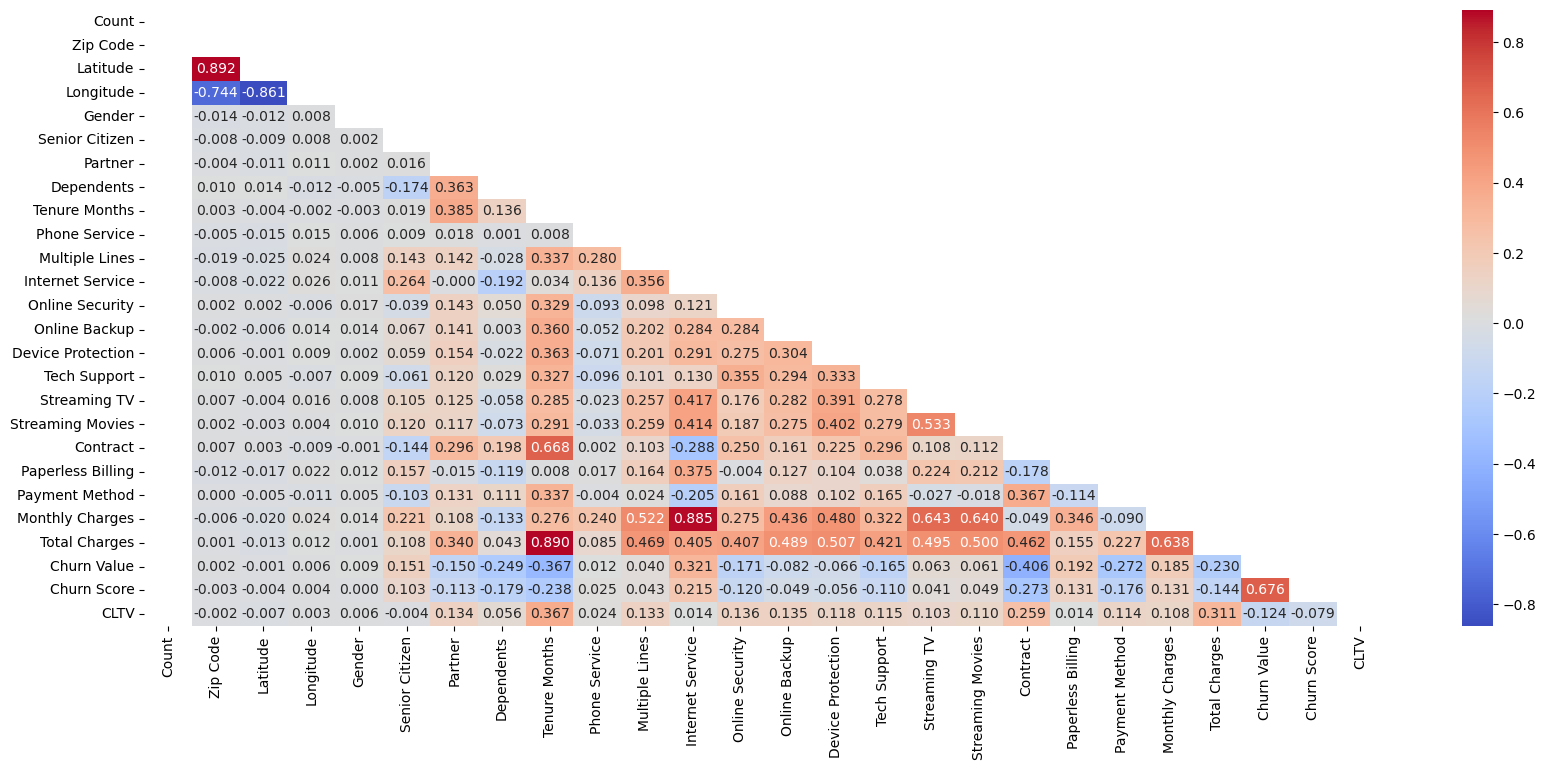

In [29]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=np.number)

plt.figure(figsize=(20, 8))
corr_matrix = numeric_cols.corr(method='spearman')

sns.heatmap(corr_matrix, cbar=True, annot=True, mask=np.triu(np.ones_like(corr_matrix, dtype=bool)), fmt='.3f', cmap='coolwarm')

plt.show()

## The correlation heatmap is used to represent the correlation between Churn Value and different features.

### > Weak positive association: Internet Service
### > Weak negative association: Tenure Months, Contract
### > Very weak positive association: Senior Citizen, Paperless Billing, Monthly Charges, Total Charges
### > Very weak negative association: Partner, Dependents, Online Security, Tech Support, Payment Method

## Demographics segmentation¶


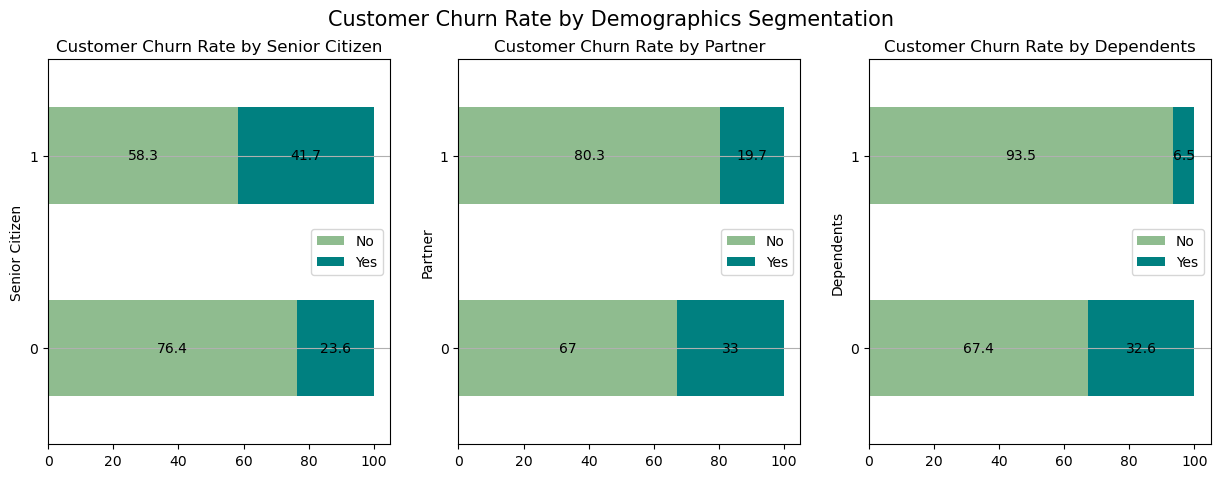

In [30]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
fig.suptitle('Customer Churn Rate by Demographics Segmentation', fontsize=15)

demo = ['Senior Citizen', 'Partner', 'Dependents']
c = ['darkseagreen', 'teal']

for i, col in enumerate(demo, start=0):
    df1 = df.groupby([col, 'Churn Label']).size().unstack()
    df1.apply(lambda x : round((x/x.sum())*100,1), axis=1).plot(kind='barh', stacked=True, color=c, ax=ax[i])
    ax[i].set_title('Customer Churn Rate by {}'.format(col))
    ax[i].legend(loc='best')
    ax[i].grid(axis='y')
    for container in ax[i].containers:
        ax[i].bar_label(container, label_type='center')


### > Nearly half (41.7%) of elderly customers have left, compared to 23.6% of non-elderly customers. This suggests that senior citizen customers are more likely to churn.
### > Customers without a partner have a higher chance of churn than customers with a partner, as a third (33%) of customers without a partner have left.
### > Customers without children, parents or grandparents are prone to churn, as nearly a third (32.6%) of them have left, compared to only 6.5% of customers with dependents.

## Product Services and Add-on Services


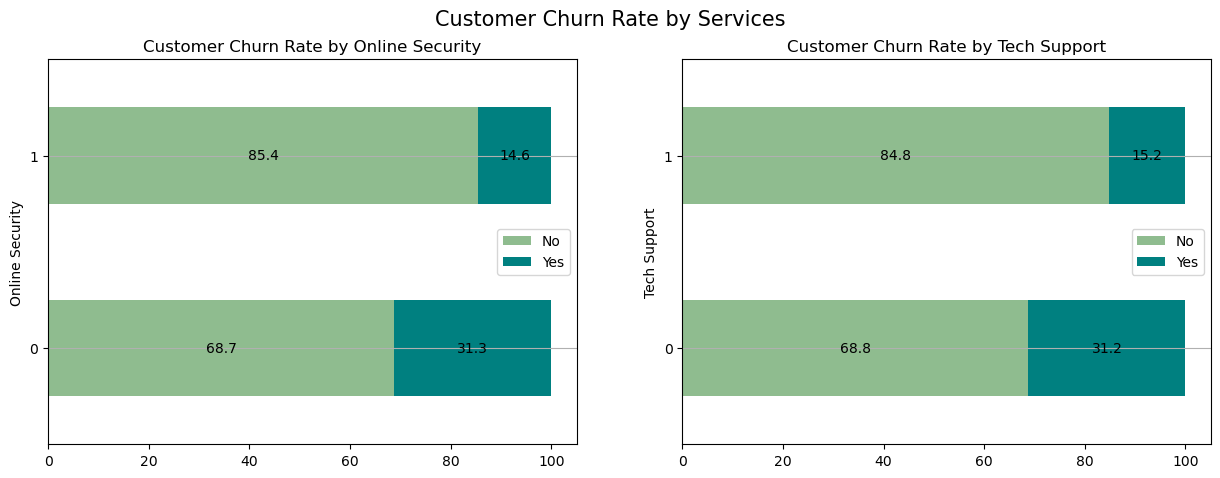

In [33]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
fig.suptitle('Customer Churn Rate by Services', fontsize=15)

service = ['Online Security', 'Tech Support']

for i, col in enumerate(service, start=0):
    df1 = df.groupby([col, 'Churn Label']).size().unstack()
    df1.apply(lambda x : round((x/x.sum())*100,1), axis=1).plot(kind='barh', stacked=True, color=c, ax=ax[i])
    ax[i].set_title('Customer Churn Rate by {}'.format(col))
    ax[i].legend(loc='best')
    ax[i].grid(axis='y')
    for container in ax[i].containers:
        ax[i].bar_label(container, label_type='center')

### > Almost half (41.9%) of customers with fiber-optic internet service have left, which means they are more prone to churn.
### > Customers who do not subscribe to additional online security services tend to churn, as nearly a third (31.3%) have left, while only 14.6% of customers with additional online security services have left.
### > Almost one-third (31.2%) of customers who don't have a technical support plan have left, compared to just 15.2% of those who have. This means that customers without technical support plan are a greater likelihood to churning.

## Payment and Billing Detail


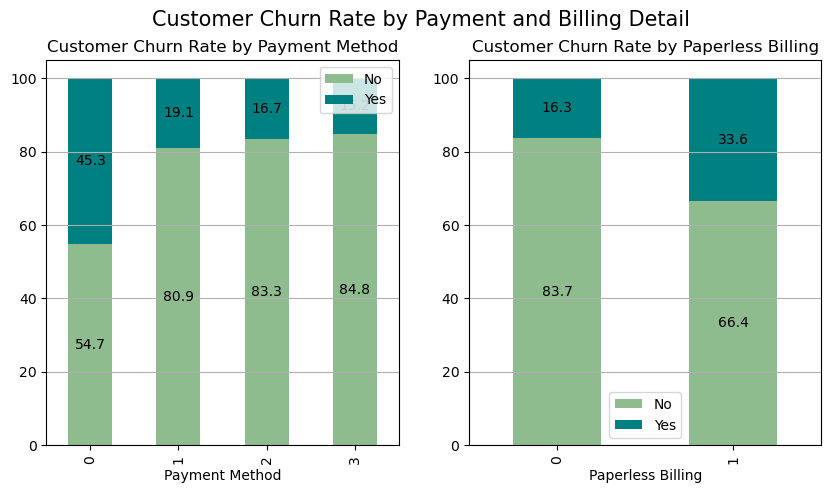

In [36]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Customer Churn Rate by Payment and Billing Detail', fontsize=15)

bill = ['Payment Method', 'Paperless Billing']

for i, col in enumerate(bill, start=0):
    df1 = df.groupby([col, 'Churn Label']).size().unstack()
    df1.apply(lambda x : round((x/x.sum())*100,1), axis=1).plot(kind='bar', stacked=True, color=c, ax=ax[i])
    ax[i].set_title('Customer Churn Rate by {}'.format(col))
    ax[i].legend(loc='best')
    ax[i].grid(axis='y')
    for container in ax[i].containers:
        ax[i].bar_label(container, label_type='center')

### > Over one third (33.6%) of customers who selected paperless billing are left, compared to only 16.3% of those who did not. This indicates that customers who choose paperless billing are prone to churn.
### > Customers who pay their bills by electronic check are more likely to churn, as nearly half (45.3%) of those who use electronic checks to pay their bills have left.

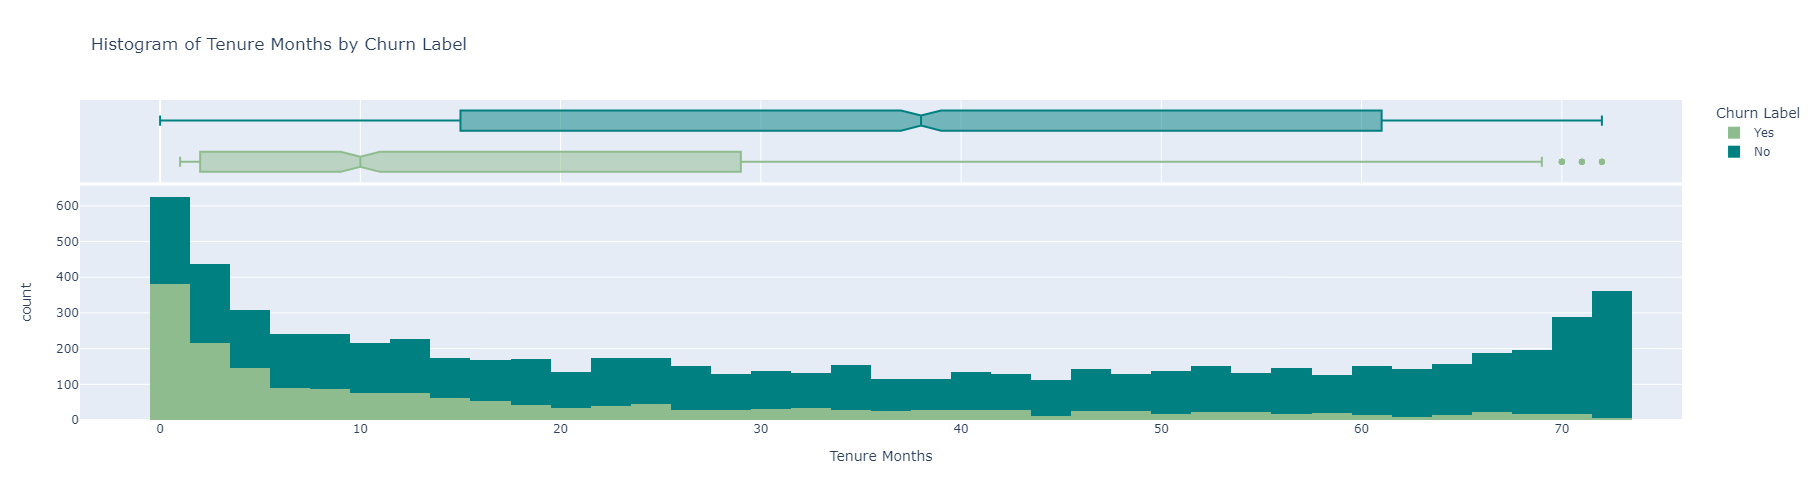

In [37]:
fig = px.histogram(df,
                   x='Tenure Months',
                   marginal='box',
                   color='Churn Label',
                   color_discrete_sequence=c,
                   title='Histogram of Tenure Months by Churn Label')

fig.update_layout(width=800, height=500)

fig.show()

C:\Users\nasir\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:1138: UserWarning:

cmap parameter ignored when using hue mapping.



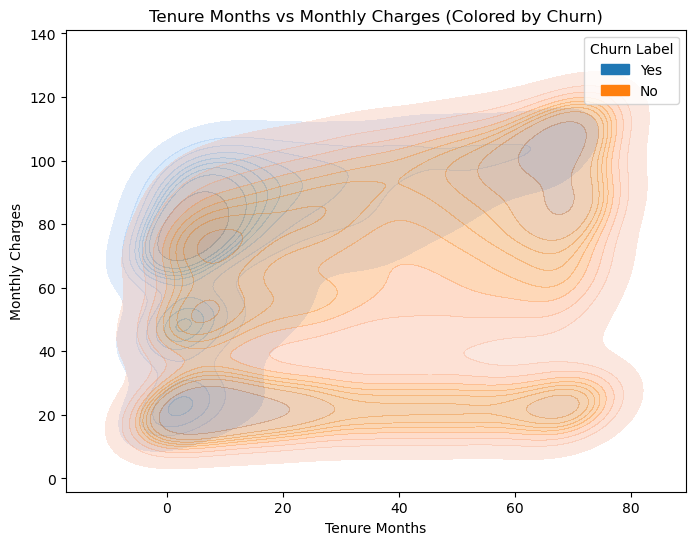

In [38]:
#Tenure Months vs Monthly Charges (Colored by Churn)
plt.figure(figsize=(8, 6))
sns.kdeplot(x='Tenure Months', y='Monthly Charges', hue='Churn Label', data=df, fill=True, cmap=['orange', 'blue'], alpha=0.3)
plt.title("Tenure Months vs Monthly Charges (Colored by Churn)")
plt.xlabel("Tenure Months")
plt.ylabel("Monthly Charges")
plt.show()

### Customers with shorter tenure months have a larger probability of leaving, as 50% of churned customers leave within the first 10 months.

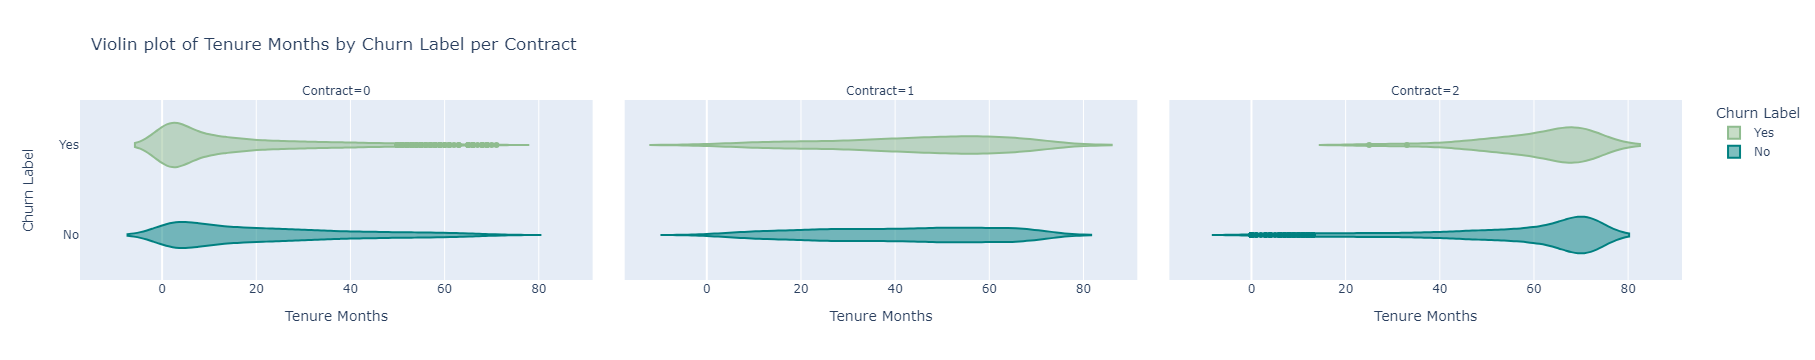

In [39]:
px.violin(df, 
         x='Tenure Months', 
         y='Churn Label', 
         color='Churn Label', 
         color_discrete_sequence=c,
         facet_col='Contract', 
         category_orders={'Contract': [0, 1, 2]}, 
         title='Violin plot of Tenure Months by Churn Label per Contract')



### For month-to-month contracts (right skewed), the majority of consumers churn during the shorter tenure months, as 50% of the churned customers leaves within 7 months.
The majority of customers leave over the longer tenure months for one-year and two-years contracts (left skewed), with 50% of churned customers leaving within 48 and 65.5 months, respectively.

## Total Charges and Monthly Charges


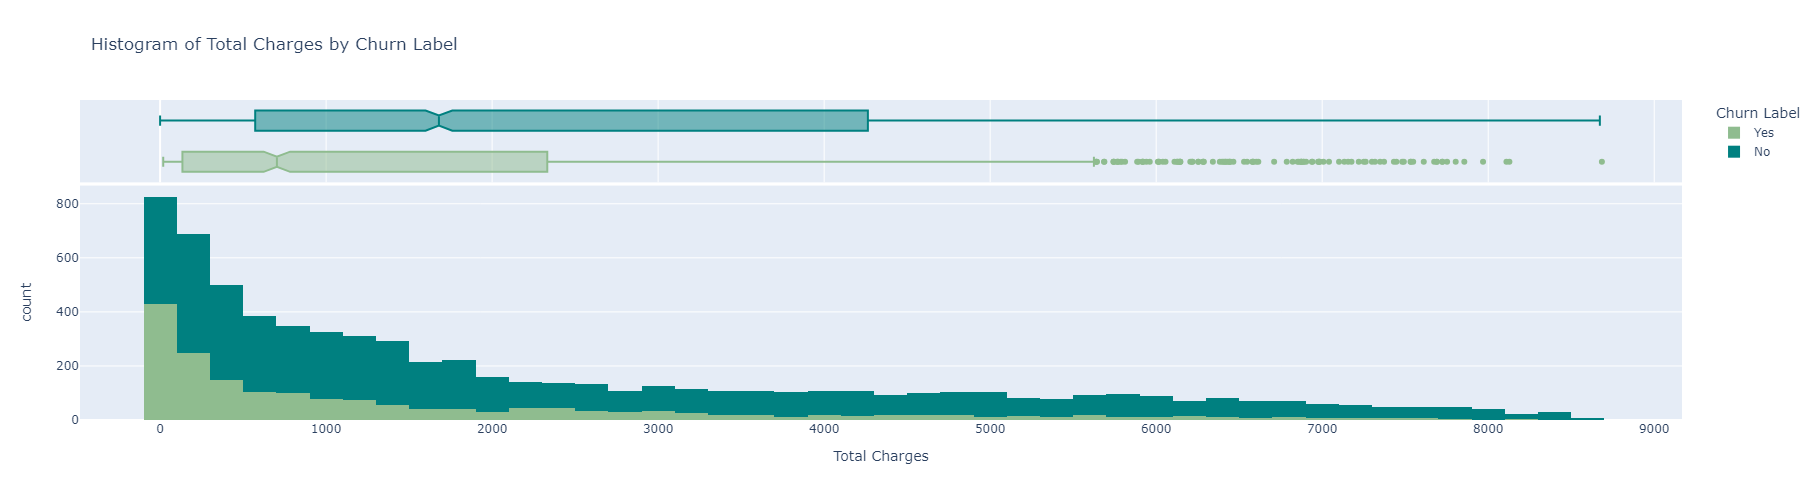

In [40]:
fig1 = px.histogram(df, 
             x='Total Charges', 
             marginal='box', 
             color='Churn Label', 
             color_discrete_sequence=c,
             title='Histogram of Total Charges by Churn Label')

fig1.update_layout(width=800, height=500)

fig1.show()

### 50% of churned customers leave between 18.89 and 703.55

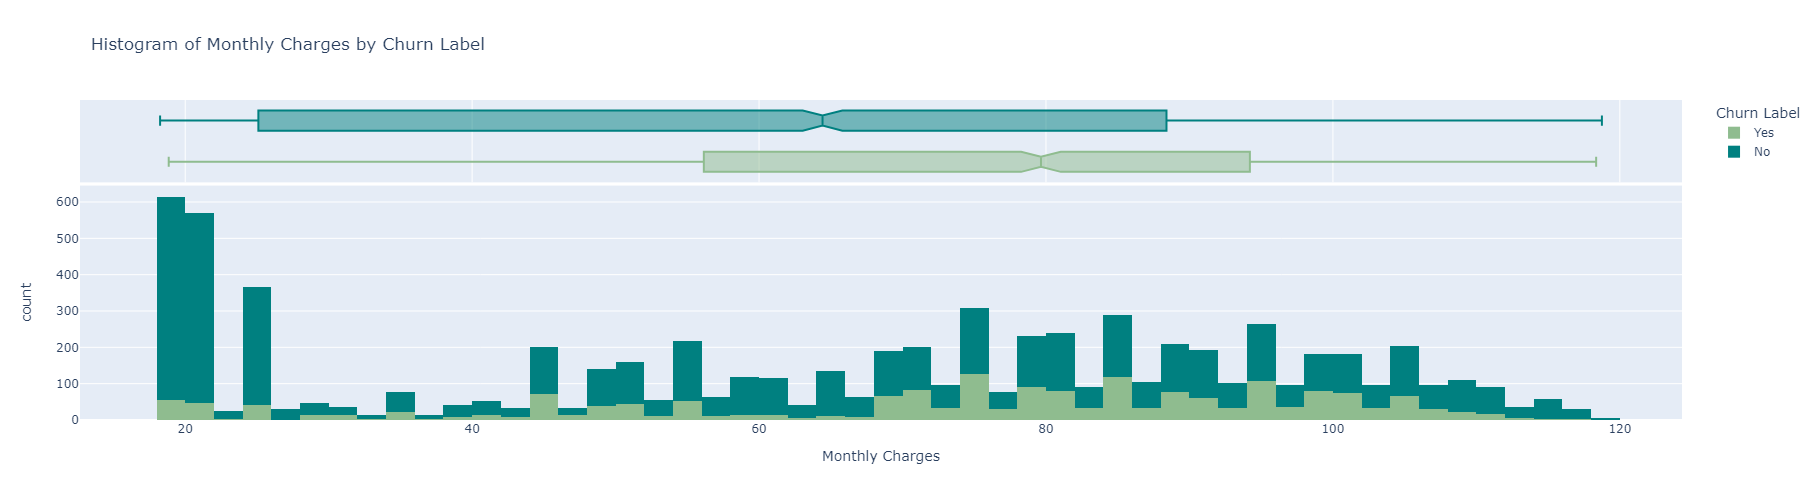

In [41]:
fig2 = px.histogram(df, 
             x='Monthly Charges', 
             marginal='box', 
             color='Churn Label', 
             color_discrete_sequence=c,
             title='Histogram of Monthly Charges by Churn Label')

fig2.update_layout(width=800, height=500)

fig2.show()

### Majority of customers churn with higher monthly fees

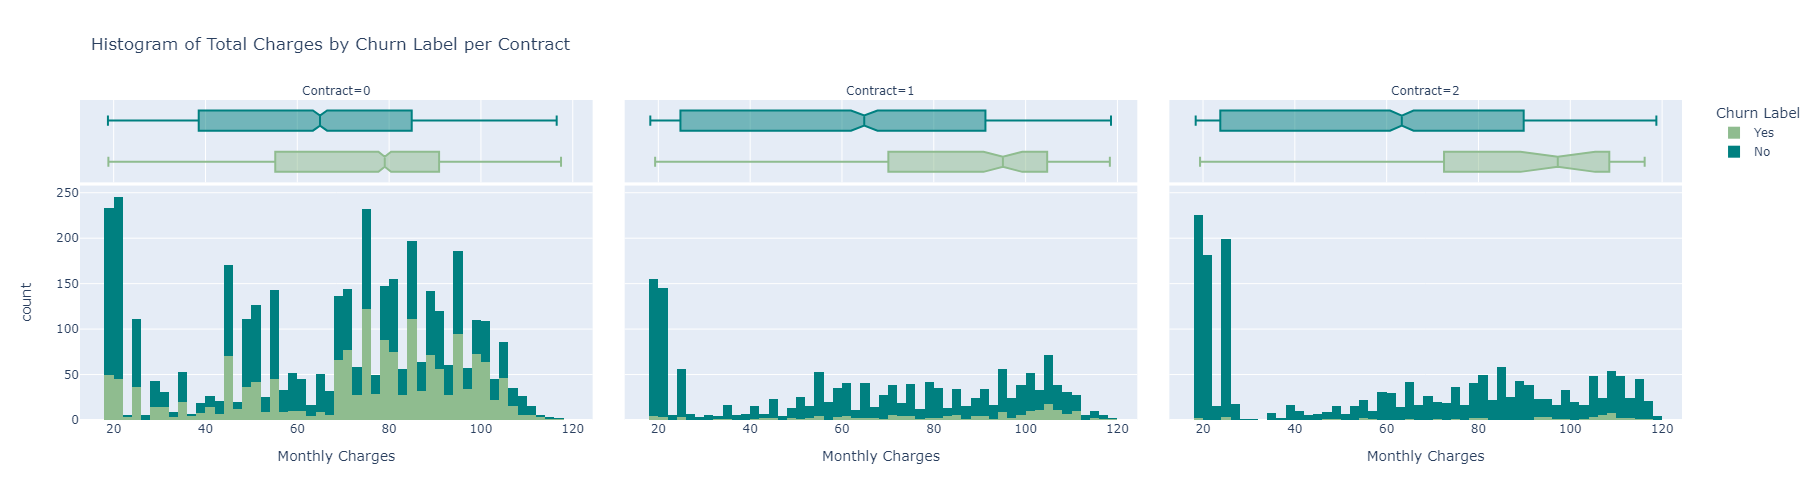

In [42]:
fig3 = px.histogram(df, 
             x='Monthly Charges', 
             marginal='box', 
             color='Churn Label', 
             color_discrete_sequence=c, 
             facet_col='Contract',
             category_orders={'Contract': [0, 1, 2]},
             title='Histogram of Total Charges by Churn Label per Contract')

fig3.update_layout(width=800, height=500)

fig3.show()

### The distributions are left skewed for all contract types, which may indicate that the most customers likely to quit when the monthly charges is higher.
### > Monthly contract have higher churn possibility

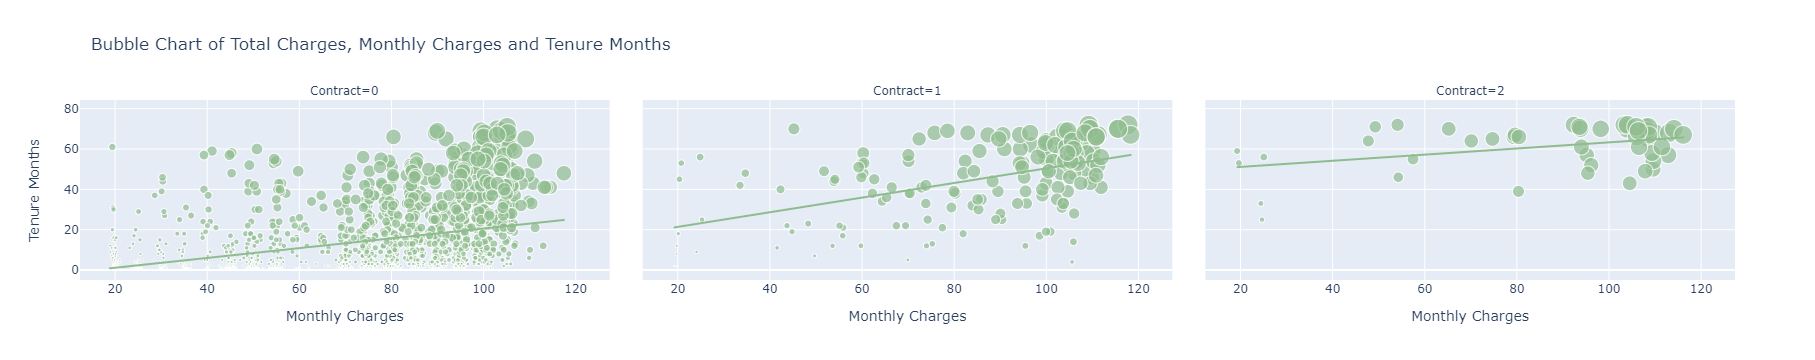

In [43]:
px.scatter(df[df['Churn Label']=='Yes'], 
         x='Monthly Charges', 
         y='Tenure Months', 
         size='Total Charges',
         color_discrete_sequence=c,
         facet_col='Contract', 
         category_orders={'Contract': [0, 1, 2]}, 
         trendline='ols',
         title='Bubble Chart of Total Charges, Monthly Charges and Tenure Months')

### Although most customers churn during the shorter tenure months from the previous violin plot, the number of months of use and the monthly charges increase accordingly for month-to-month contracts. 
This suggests a weak positive relationship between tenure months and monthly contract. Also, the bubbles get bigger when the tenure months are longer, meaning monthly contract customers choose to leave during longer tenure months with higher total charges.

For one-year and two-year contracts, the number of months of use and the monthly charges increase proportionally, and the higher the tenure months and the monthly charges, the greater the bubble. This shows that customers tend to leave when total charges, monthly charges, and months of usage increase.

# Model Building

Text(0.5, 1.0, 'Count Plot of Churn Value')

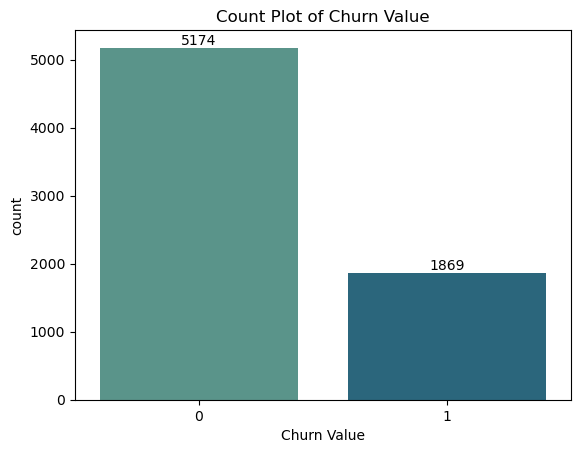

In [44]:
p = 'crest'
ax = sns.countplot(data=df, x='Churn Value', palette=p)
for container in ax.containers:
    ax.bar_label(container)
ax.set_title('Count Plot of Churn Value')

# Pre processing for Modeling

In [45]:
df.drop(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long','Latitude','Longitude', 'Churn Label', 'Churn Score', 'CLTV', 'Churn Reason',  'Root Cause'], axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   int64  
 1   Senior Citizen     7043 non-null   int64  
 2   Partner            7043 non-null   int64  
 3   Dependents         7043 non-null   int64  
 4   Tenure Months      7043 non-null   int64  
 5   Phone Service      7043 non-null   int64  
 6   Multiple Lines     7043 non-null   int64  
 7   Internet Service   7043 non-null   int64  
 8   Online Security    7043 non-null   int64  
 9   Online Backup      7043 non-null   int64  
 10  Device Protection  7043 non-null   int64  
 11  Tech Support       7043 non-null   int64  
 12  Streaming TV       7043 non-null   int64  
 13  Streaming Movies   7043 non-null   int64  
 14  Contract           7043 non-null   int64  
 15  Paperless Billing  7043 non-null   int64  
 16  Payment Method     7043 

In [46]:
df.head()

Gender  Senior Citizen  Partner  Dependents  Tenure Months  Phone Service  \
0       0               0        0           0              2              1   
1       1               0        0           1              2              1   
2       1               0        0           1              8              1   
3       1               0        1           1             28              1   
4       0               0        0           1             49              1   

   Multiple Lines  Internet Service  Online Security  Online Backup  \
0               0                 1                1              1   
1               0                 2                0              0   
2               1                 2                0              0   
3               1                 2                0              0   
4               1                 2                0              1   

   Device Protection  Tech Support  Streaming TV  Streaming Movies  Contract  \
0                  0             0             0                 0         0   
1                  0             0             0                 0         0   
2                  1             0             1                 1         0   
3                  1             1             1                 1         0   
4                  1             0             1                 1         0   

   Paperless Billing  Payment Method  Monthly Charges  Total Charges  \
0                  1               1            53.85         108.15   
1                  1               0            70.70         151.65   
2                  1               0            99.65         820.50   
3                  1               0           104.80        3046.05   
4                  1               2           103.70        5036.30   

   Churn Value  
0            1  
1            1  
2            1  
3            1  
4            1

In [47]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, auc, classification_report, ConfusionMatrixDisplay
from sklearn.feature_selection import RFECV
import random
import tensorflow as tf

# Set a global seed to obtain stable results
seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)


# Define X and y
X = df.copy()
y = X.pop('Churn Value')

In [48]:
# Stratified train-test split
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train_idx, test_idx in skfold.split(X,y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

In [49]:
#  Fit the scaler on the train data and then use it to transform the test data 
scaler = StandardScaler()
scaled_train = scaler.fit_transform(X_train) 
scaled_test = scaler.transform(X_test)
X_train = pd.DataFrame(scaled_train, index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaled_test, index=X_test.index, columns=X_test.columns)

In [51]:
X_train.head()

Gender  Senior Citizen   Partner  Dependents  Tenure Months  \
1  1.014119       -0.434821 -0.962889    1.832507      -1.237918   
2  1.014119       -0.434821 -0.962889    1.832507      -0.992882   
3  1.014119       -0.434821  1.038542    1.832507      -0.176098   
4 -0.986077       -0.434821 -0.962889    1.832507       0.681526   
6 -0.986077        2.299796 -0.962889   -0.545701      -1.278757   

   Phone Service  Multiple Lines  Internet Service  Online Security  \
1       0.328879       -0.857894          1.002679        -0.628607   
2       0.328879        1.165645          1.002679        -0.628607   
3       0.328879        1.165645          1.002679        -0.628607   
4       0.328879        1.165645          1.002679        -0.628607   
6      -3.040634       -0.857894         -0.284066        -0.628607   

   Online Backup  Device Protection  Tech Support  Streaming TV  \
1      -0.726587          -0.726872     -0.634931     -0.796715   
2      -0.726587           1.375758     -0.634931      1.255154   
3      -0.726587           1.375758      1.574974      1.255154   
4       1.376298           1.375758     -0.634931      1.255154   
6      -0.726587           1.375758     -0.634931     -0.796715   

   Streaming Movies  Contract  Paperless Billing  Payment Method  \
1         -0.799993  -0.82833           0.827104       -1.150191   
2          1.250011  -0.82833           0.827104       -1.150191   
3          1.250011  -0.82833           0.827104       -1.150191   
4          1.250011  -0.82833           0.827104        0.599391   
6          1.250011  -0.82833           0.827104       -1.150191   

   Monthly Charges  Total Charges  
1         0.198087      -0.938710  
2         1.162053      -0.642656  
3         1.333535       0.342443  
4         1.296908       1.223390  
6        -0.835804      -0.988284

In [52]:
import pickle
# Save the preprocessor using pickle
with open('preprocessor.pkl', "wb") as file:
    pickle.dump(scaler, file)

In [46]:
X_test.head()

Gender  Senior Citizen   Partner  Dependents  Tenure Months  \
0  -0.986077       -0.434821 -0.962889   -0.545701      -1.237918   
5   1.014119       -0.434821  1.038542   -0.545701      -0.911204   
19  1.014119       -0.434821 -0.962889    1.832507      -1.278757   
23  1.014119        2.299796  1.038542    1.832507      -0.298616   
26  1.014119        2.299796  1.038542    1.832507       0.191455   

    Phone Service  Multiple Lines  Internet Service  Online Security  \
0        0.328879       -0.857894         -0.284066         1.590818   
5        0.328879       -0.857894         -0.284066        -0.628607   
19       0.328879       -0.857894          1.002679        -0.628607   
23       0.328879       -0.857894          1.002679        -0.628607   
26       0.328879        1.165645          1.002679        -0.628607   

    Online Backup  Device Protection  Tech Support  Streaming TV  \
0        1.376298          -0.726872     -0.634931     -0.796715   
5       -0.726587           1.375758      1.574974     -0.796715   
19      -0.726587          -0.726872     -0.634931      1.255154   
23       1.376298           1.375758     -0.634931      1.255154   
26      -0.726587          -0.726872     -0.634931     -0.796715   

    Streaming Movies  Contract  Paperless Billing  Payment Method  \
0          -0.799993  -0.82833           0.827104       -0.275400   
5          -0.799993  -0.82833          -1.209038        1.474182   
19         -0.799993  -0.82833           0.827104       -1.150191   
23          1.250011  -0.82833           0.827104       -1.150191   
26         -0.799993  -0.82833           0.827104       -1.150191   

    Monthly Charges  Total Charges  
0         -0.362978      -0.957964  
5         -0.318026      -0.771970  
19         0.486111      -0.970712  
23         1.123760       0.107162  
26         0.391213       0.263698

In [50]:
# Resample the train data
# Do not resample the test data to prevent overfitting and poor generalization to the test data
smote = SMOTE(sampling_strategy='minority')
X_train, y_train = smote.fit_resample(X_train, y_train)

### Hyperparameter Tuning: Random Forest Classifier


In [50]:
rf = RandomForestClassifier(class_weight='balanced', random_state=seed)
n_estimators = [100, 1000]
max_depth = [4, 6, 8]
rf_param = dict(n_estimators=n_estimators, max_depth=max_depth)
rf_search = GridSearchCV(rf, rf_param, scoring='f1', n_jobs=-1, cv=skfold)
rf_result = rf_search.fit(X_train, y_train)


print('Best: %f using %s' % (rf_result.best_score_, rf_result.best_params_))

Best: 0.836993 using {'max_depth': 8, 'n_estimators': 1000}


## Hyperparameter Tuning: Logistic Regression


In [51]:
lr = LogisticRegression(class_weight='balanced', random_state=seed)
solver = ['liblinear']
penalty = ['l1', 'l2']
lr_param = dict(solver=solver, penalty=penalty)
lr_search = GridSearchCV(lr, lr_param, scoring='f1', n_jobs=-1, cv=skfold)
lr_result = lr_search.fit(X_train, y_train)


print('Best: %f using %s' % (lr_result.best_score_, lr_result.best_params_))

Best: 0.795239 using {'penalty': 'l2', 'solver': 'liblinear'}


## Hyperparameter Tuning: AdaBoost Classifer


In [52]:
ab = AdaBoostClassifier(random_state=seed)
learning_rate = [0.1, 0.3, 0.5]
n_estimators = [100, 1000]
ab_param = dict(learning_rate=learning_rate, n_estimators=n_estimators)
ab_search = GridSearchCV(ab, ab_param, scoring='f1', n_jobs=-1, cv=skfold)
ab_result = ab_search.fit(X_train, y_train)


print('Best: %f using %s' % (ab_result.best_score_, ab_result.best_params_))

Best: 0.853570 using {'learning_rate': 0.5, 'n_estimators': 1000}


## Hyperparameter Tuning: XGBoost Classifier


In [51]:
xgb = XGBClassifier(random_state=seed)
max_depth = [3, 6, 9]
learning_rate = [0.1, 0.3, 0.5]
n_estimators = [100, 1000]
xgb_param = dict(max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators)
xgb_search = GridSearchCV(xgb, xgb_param, scoring='f1', n_jobs=-1, cv=skfold)
xgb_result = xgb_search.fit(X_train, y_train)


print('Best: %f using %s' % (xgb_result.best_score_, xgb_result.best_params_))

Best: 0.860834 using {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100}


### Modeling

In [52]:
RFParams = {'max_depth': 8, 'n_estimators': 1000}
LRParams = {'penalty': 'l1', 'solver': 'liblinear'}
ABParams = {'learning_rate': 0.5, 'n_estimators': 1000}
XGBParams = {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100}


classifiers = {
                   'Random Forest Classifier':RandomForestClassifier(**RFParams, class_weight='balanced', random_state=seed),
                   'Logistic Regression': LogisticRegression(**LRParams, class_weight='balanced', random_state=seed),
                   'AdaBoost Classifier': AdaBoostClassifier(**ABParams, random_state=seed),
                   'XGBoost Classifier' : XGBClassifier(**XGBParams,random_state=seed)
                  }

In [56]:
def model_comparison_evaluate(classifiers, X, y):
    for name, model in classifiers.items():
        f1scores = cross_val_score(model, X, y, scoring='f1', cv=skfold, n_jobs=-1)
        rascores = cross_val_score(model, X, y, scoring='roc_auc', cv=skfold, n_jobs=-1)
        print('{}:'.format(name))
        print('Mean F1 score using K-fold cross-validation : %.3f (%.3f)' % (f1scores.mean(), f1scores.std()))
        print('Mean ROC AUC score using K-fold cross-validation : %.3f (%.3f)\n\n' % (rascores.mean(), rascores.std()))

In [57]:
model_comparison_evaluate(classifiers, X_train, y_train)


Random Forest Classifier:
Mean F1 score using K-fold cross-validation : 0.837 (0.007)
Mean ROC AUC score using K-fold cross-validation : 0.909 (0.007)


Logistic Regression:
Mean F1 score using K-fold cross-validation : 0.795 (0.002)
Mean ROC AUC score using K-fold cross-validation : 0.871 (0.009)


AdaBoost Classifier:
Mean F1 score using K-fold cross-validation : 0.854 (0.007)
Mean ROC AUC score using K-fold cross-validation : 0.934 (0.006)


XGBoost Classifier:
Mean F1 score using K-fold cross-validation : 0.861 (0.004)
Mean ROC AUC score using K-fold cross-validation : 0.940 (0.005)




### XGBoost classifier using K-fold cross-validation has the highest mean F1 score and small standard deviation, as well as the highest mean ROC AUC score and smallest standard deviation when compared to models, it will be used to determine whether a customer has churned.

In [59]:
model = XGBClassifier(**XGBParams, random_state=seed)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, labels=[0,1], target_names=['Non-churned [0]', 'Churned [1]']))

                 precision    recall  f1-score   support

Non-churned [0]       0.87      0.83      0.85      1035
    Churned [1]       0.59      0.66      0.62       373

       accuracy                           0.79      1408
      macro avg       0.73      0.75      0.74      1408
   weighted avg       0.80      0.79      0.79      1408



## Model Evaluation

In [60]:
y_pred_score = model.predict_proba(X_test.values)[:,1]

In [62]:
X_test.head()

Gender  Senior Citizen   Partner  Dependents  Tenure Months  \
0  -0.986077       -0.434821 -0.962889   -0.545701      -1.237918   
5   1.014119       -0.434821  1.038542   -0.545701      -0.911204   
19  1.014119       -0.434821 -0.962889    1.832507      -1.278757   
23  1.014119        2.299796  1.038542    1.832507      -0.298616   
26  1.014119        2.299796  1.038542    1.832507       0.191455   

    Phone Service  Multiple Lines  Internet Service  Online Security  \
0        0.328879       -0.857894         -0.284066         1.590818   
5        0.328879       -0.857894         -0.284066        -0.628607   
19       0.328879       -0.857894          1.002679        -0.628607   
23       0.328879       -0.857894          1.002679        -0.628607   
26       0.328879        1.165645          1.002679        -0.628607   

    Online Backup  Device Protection  Tech Support  Streaming TV  \
0        1.376298          -0.726872     -0.634931     -0.796715   
5       -0.726587           1.375758      1.574974     -0.796715   
19      -0.726587          -0.726872     -0.634931      1.255154   
23       1.376298           1.375758     -0.634931      1.255154   
26      -0.726587          -0.726872     -0.634931     -0.796715   

    Streaming Movies  Contract  Paperless Billing  Payment Method  \
0          -0.799993  -0.82833           0.827104       -0.275400   
5          -0.799993  -0.82833          -1.209038        1.474182   
19         -0.799993  -0.82833           0.827104       -1.150191   
23          1.250011  -0.82833           0.827104       -1.150191   
26         -0.799993  -0.82833           0.827104       -1.150191   

    Monthly Charges  Total Charges  
0         -0.362978      -0.957964  
5         -0.318026      -0.771970  
19         0.486111      -0.970712  
23         1.123760       0.107162  
26         0.391213       0.263698

In [61]:
y_pred_score

array([0.18782315, 0.3336053 , 0.8816718 , ..., 0.3332669 , 0.14654055,
       0.2572385 ], dtype=float32)

Text(0.5, 0, 'False Positive Rate')

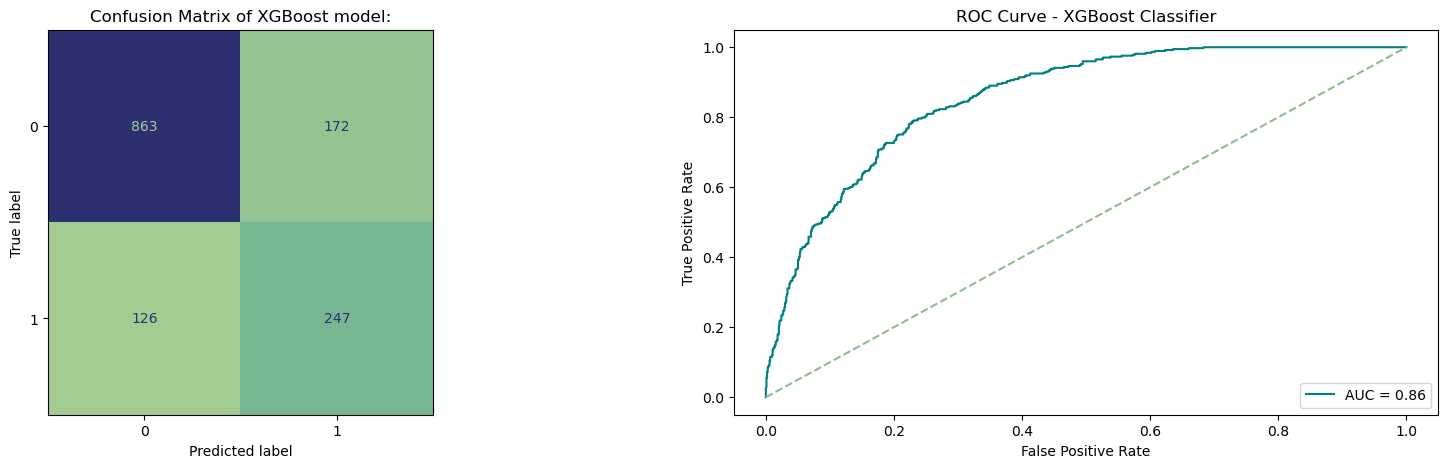

In [62]:

fig, ax = plt.subplots(1, 2, figsize=(20,5))
ax[0].set_title('Confusion Matrix of XGBoost model:')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, colorbar=False, cmap='crest', ax=ax[0])
ax[0].grid(False)


# Compute ROC metrics:
fpr, tpr, thresholds = roc_curve(y_test.values, y_pred_score)
roc_auc = auc(fpr, tpr)
                         
ax[1].set_title('ROC Curve - XGBoost Classifier')
ax[1].plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc, c='teal')
ax[1].plot([0,1],[0,1],'--', c='darkseagreen')
ax[1].legend(loc='lower right')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_xlabel('False Positive Rate')

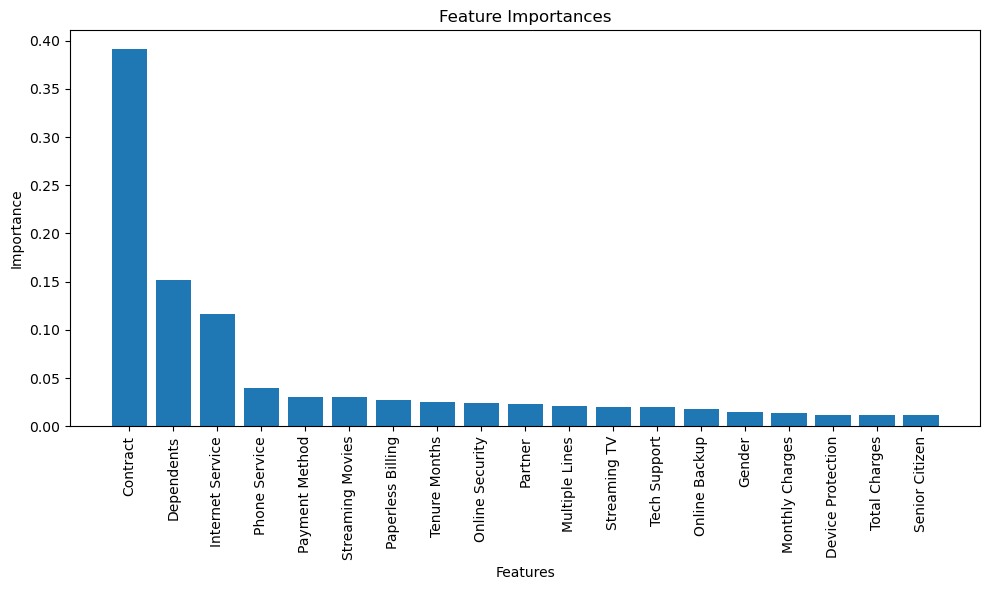

Contract: 0.39122527837753296
Dependents: 0.15165242552757263
Internet Service: 0.11647070944309235
Phone Service: 0.039280932396650314
Payment Method: 0.030035683885216713
Streaming Movies: 0.029872171580791473
Paperless Billing: 0.02703046053647995
Tenure Months: 0.025042448192834854
Online Security: 0.02387257106602192
Partner: 0.023065144196152687
Multiple Lines: 0.02068864367902279
Streaming TV: 0.019871270284056664
Tech Support: 0.01964743807911873
Online Backup: 0.01760529913008213
Gender: 0.015010407194495201
Monthly Charges: 0.013913457281887531
Device Protection: 0.012118669226765633
Total Charges: 0.011887620203197002
Senior Citizen: 0.011709398590028286


In [63]:
# Get feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Extract feature names
feature_names = X_train.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

# Print feature importances
for feature, importance in zip(feature_names[indices], importances[indices]):
    print(f"{feature}: {importance}")

In [70]:
import pickle

# Save the model
with open('churn_model.pkl', 'wb') as file:
    pickle.dump(model, file)



In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler



def preprocess_data(df):
    
    def scale_data_for_prediction(data):
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(data)
        scaled_df = pd.DataFrame(scaled_data, index=data.index, columns=data.columns)
        return scaled_df
    
    # Convert string categorical variables into numeric variables
    df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})

    df['Contract'] = df['Contract'].map({'Two year': 2, 'One year': 1, 'Month-to-month': 0})

    for col in ['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Paperless Billing']:
        df[col] = df[col].map({'Yes': 1, 'No': 0})

    df['Multiple Lines'] = df['Multiple Lines'].map({'Yes': 1, 'No': 0, 'No phone service': 0})

    df['Payment Method'] = df['Payment Method'].map({'Credit card (automatic)': 3, 'Bank transfer (automatic)': 2, 'Mailed check': 1, 'Electronic check': 0})

    df['Internet Service'] = df['Internet Service'].map({'Fiber optic': 2, 'DSL': 1, 'No': 0})

    for col in ['Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies']:
        df[col] = df[col].map({'Yes': 1, 'No': 0, 'No internet service': 0})

    df_scaled = scale_data_for_prediction(df)    
    
    return df_scaled
        
    



## Prediction using Flask

In [110]:
import requests
 
    
    # Input data for prediction
data = {
        'Gender': 'Female',
        'Senior Citizen': 'No',
        'Partner': 'No',
        'Dependents': 'Yes',
        'Tenure Months': '5',
        'Phone Service': 'Yes',
        'Multiple Lines': 'Yes',
        'Internet Service': 'Fiber optic',
        'Online Security': 'Yes',
        'Online Backup': 'Yes',
        'Device Protection': 'Yes',
        'Tech Support': 'Yes',
        'Streaming TV': 'Yes',
        'Streaming Movies': 'Yes',
        'Contract': 'Month-to-month',
        'Paperless Billing': 'Yes',
        'Payment Method': 'Credit card (automatic)',
        'Monthly Charges': '50.99',
        'Total Charges': '100.88'
    }
    
# Send a POST request to the /predict endpoint
response = requests.post('http://127.0.0.1:5000/predict', json=data)

# Print the response
print(response.json())    

{'predictions': [[0.6548506021499634, 0.34514936804771423]]}
